# 3.12. Comparar y probar modelos de corderos

Al llegar acá contamos con 3 modelos para comparar, por lo tanto la comparación se va a realizar sobre ellos.

Recordemos que:
- El modelo 1 se entreno con el dataset a nivel departamental de Chubut (Dataset 1).
- El modelo 2 se entreno con el dataset a nivel departamental de Chubut mas los datos del Mirabueno, tener en cuenta que contiene al dataset anterior (Dataset 2).
- El modelo 3 se entreno con el dataset actualizado a nivel departamental de Chubut (Dataset 3).

Para hacer la comparación se van a tomar las siguientes reglas:
- Si el score es menor a 0, es decir valores negativos, se le va a restar 1.
- Si el score es menor a 0.60, se le va a restar 0.5.
- Si el score es mayor o igual a 0.60, se le va a sumar 1.
- Se le va a sumar un punto a aquel modelo que funcione mejor.
- Se le va a restar 0.25 a aquel modelo que puede conocer los datos debido a que fue entrenado por ese dataset, recordemos que en este punto cada modelo solo conoce el 80% de su dataset de entrenamiento.
- Opcional: hay dos dataset que se parecen, en cuyo caso se lo va a penalizar con 0.2.

En la siguiente celda de código, se importarán varias librerías, entre ellas:

- Pandas para manejar los datos a través de DataFrames.
- Matplotlib y Seaborn se utilizarán para visualizar los resultados de las predicciones mediante gráficos.
- De Scikit-learn se utilizarán la  métricas **r2_score**.
- Por último, se usará load_pickle para recuperar el modelo entrenado guardado previamente.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.iolib.smpickle import load_pickle

Primero cargaremos los tres modelos para luego probarlos con datos. 

In [2]:
modelo_corderos_1 = load_pickle('modelos/modelo_prediccion_corderos_1')
modelo_corderos_2 = load_pickle('modelos/modelo_prediccion_corderos_2')
modelo_corderos_3 = load_pickle('modelos/modelo_prediccion_corderos_3')

## Pruebas con dos tuplas

La idea acá es simular que un productor cuenta con dos años de datos respecto a la lluvia y al total de ovejas. Entonces le pasamos ambos datos al modelo, y con ellos hace la predicción, dándonos los corderos, dato que también conocemos y nos sirve para comparar el valor real con el valor predicho. 

### Prueba 1

Se tomaron dos observaciones del año 2013 y 2014 correspondientes a Biedma del Dataset 1. 

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 82998 | 226.5 | 26832 |
| 82706 | 331.3 | 29900 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [3]:
resultado_prediccion_1 = modelo_corderos_1.predict([[226.5,82998], [331.3,82706]])

In [4]:
resultado_prediccion_2 = modelo_corderos_2.predict([[226.5,82998], [331.3,82706]])

In [5]:
resultado_prediccion_3 = modelo_corderos_3.predict([[226.5,82998], [331.3,82706]])

In [6]:
dato_real =[[26832],[29900]]

In [7]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: -20.98'

In [8]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: -8.20'

In [9]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: -74.77'

Se observa que ningún modelo lográ predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

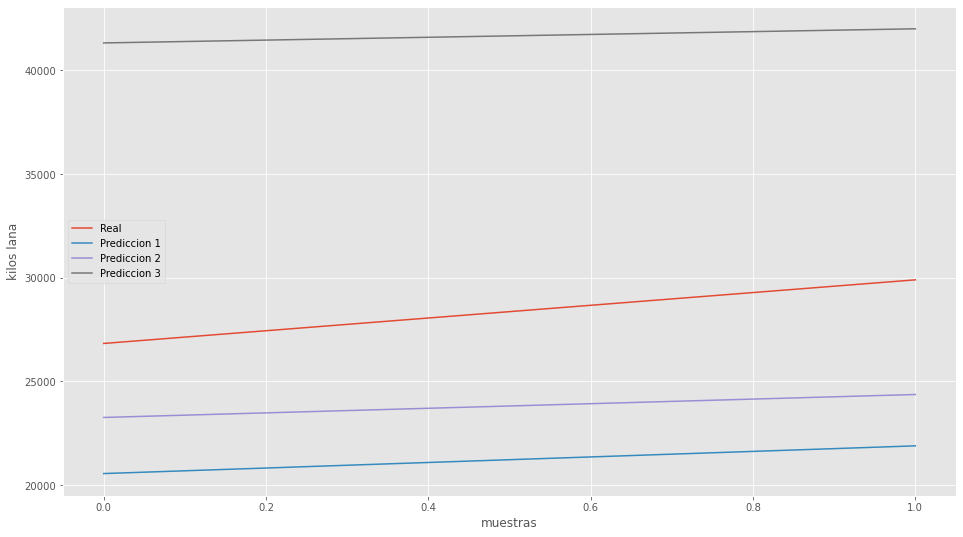

In [10]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelos no logran predecir estos datos dado que las tres lineas de predicción no se ajustan a la real y están muy alejadas (de ahí los valores negativos).

Entonces el "mejor modelo" resulta ser el 2, seguido por el 1 y el que peor predice es el 3. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -1.25 | -1.25 |
| 2 | 1 | -1.20 | -0.20 |
| 3 | 0 | -1.00 | -1.00 |

### Prueba 2

Se tomaron dos obsevaciones correspondientes a Biedma del 2014 y a Florentino Ameghino del 2013 del Dataset 3.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 61195 | 331.3 | 34926 |
| 150199 | 135.5 | 95320 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [11]:
resultado_prediccion_1 = modelo_corderos_1.predict([[331.3,61195], [135.5,150199]])

In [12]:
resultado_prediccion_2 = modelo_corderos_2.predict([[331.3,61195], [135.5,150199]])

In [13]:
resultado_prediccion_3 = modelo_corderos_3.predict([[331.3,61195], [135.5,150199]])

In [14]:
dato_real =[[34926],[95320]]

In [15]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: -0.63'

In [16]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: -0.54'

In [17]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: 0.78'

Se observa que solo un modelo lográ predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

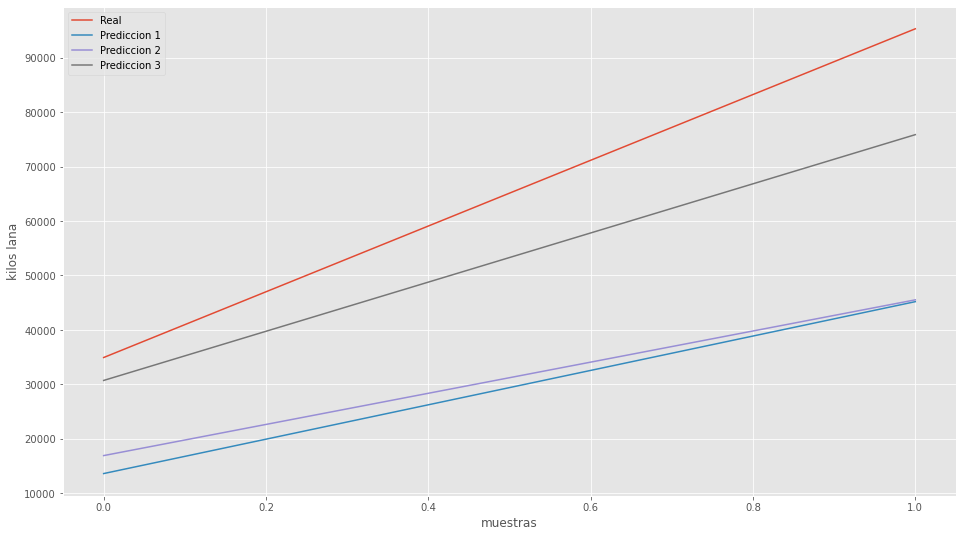

In [18]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, un modelo está mas cerca de la línea real y los otros modelos no logran predecir estos datos.

Entonces el mejor modelo resulta ser el 3, seguido por el 2 y el que peor predice es el 1. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -1.00 | -2.25 |
| 2 | 0 | -1.00 | -1.20 |
| 3 | 1 | -0.25 | -0.25 |

### Prueba 3

Se tomaron dos obsevaciones correspondientes a Biedma del 2012 y a Florentino Ameghino de 2009 del Dataset 1.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 93378 | 46.40 | 16071 |
| 150454 | 137.7 | 51674 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [19]:
resultado_prediccion_1 = modelo_corderos_1.predict([[46.40,93378], [137.7,150454]])

In [20]:
resultado_prediccion_2 = modelo_corderos_2.predict([[46.40,93378], [137.7,150454]])

In [21]:
resultado_prediccion_3 = modelo_corderos_3.predict([[46.40,93378], [137.7,150454]])

In [22]:
dato_real =[[16071],[51674]]

In [23]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.88'

In [24]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.82'

In [25]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: -1.29'

Se observa que dos modelos logran predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

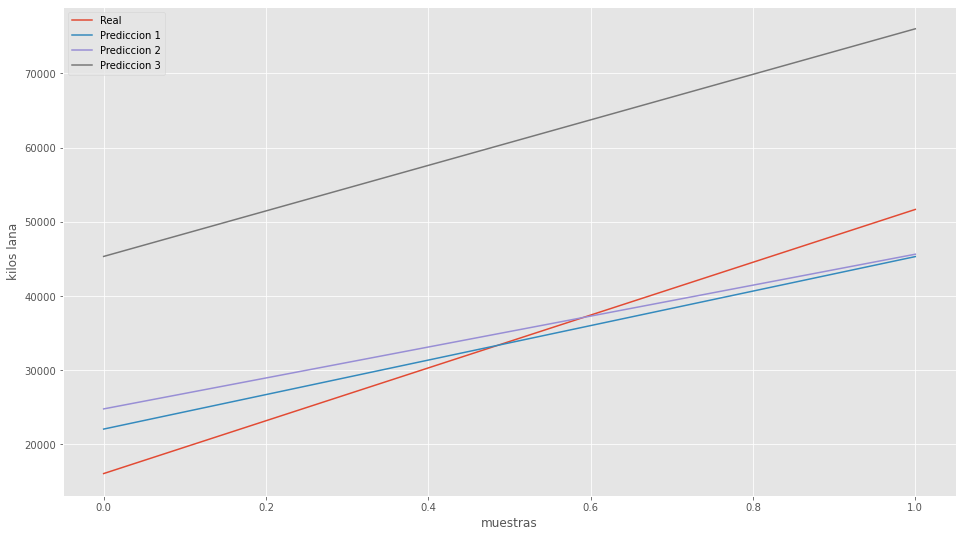

In [26]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, dos modelos logran predecir estos datos, pero el modelo 3 está muy alejado.

El mejor modelo resulta ser el 1, pero como fue entrenado con estos datos se lo va a penalizar, seguido por el 2 y por último el 3 . 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 2 | -0.25 | -0.50 |
| 2 | 1 | -0.20 | -0.40 |
| 3 | 0 | -1 | -1.25 |

### Prueba 4

Se tomaron dos obsevaciones correspondientes a Rawson del 2014 y a Río Senguer de 2013 del Dataset 1.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 61699 | 187.2 | 18436 |
| 384024 | 105.77 | 143717 |

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [27]:
resultado_prediccion_1 = modelo_corderos_1.predict([[187.2,61699], [105.77,384024]])

In [28]:
resultado_prediccion_2 = modelo_corderos_2.predict([[187.2,61699], [105.77,384024]])

In [29]:
resultado_prediccion_3 = modelo_corderos_3.predict([[187.2,61699], [105.77,384024]])

In [30]:
dato_real =[[18436],[143717]]

In [31]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: 0.98'

In [32]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: 0.96'

In [33]:
'Score o R2 de la predicción 3: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción 3: 0.60'

Se observa que todos los modelos logran predecir correctamente estos datos según el R2, al tres le costo un poco.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

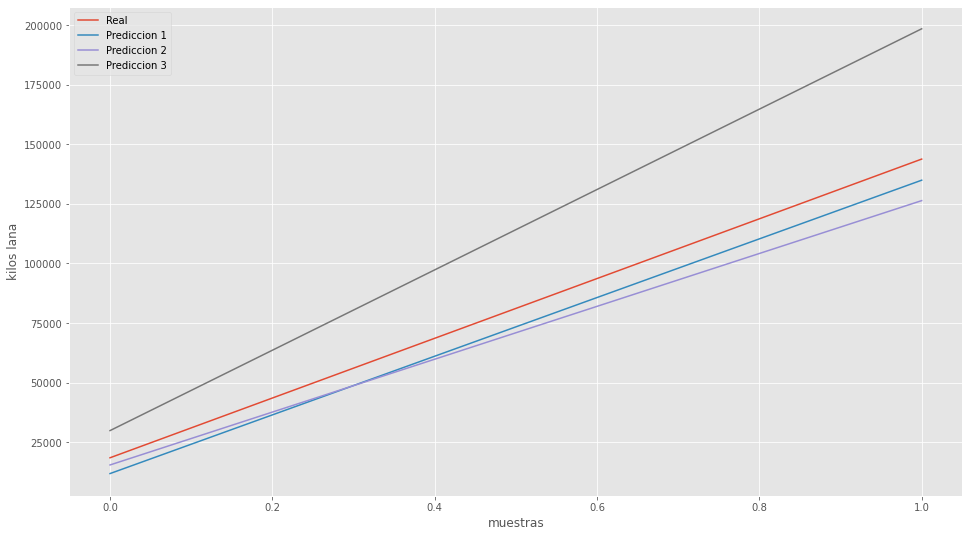

In [34]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelo logran predecir estos datos pero están un poco alejados.

El mejor modelo resulta ser el 1, seguido por el 2 y el puntaje más bajo lo tiene el 3. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 2 | -0.25 | 1.25 |
| 2 | 1 | -0.20 | 0.40|
| 3 | 1 | 0 | -0.25 |

### Prueba 5

Se tomaron dos obsevaciones correspondientes a Gaiman del 2014 y a Futalefú de 2014 del Dataset 3.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 90039 | 137.93 | 50701 |
| 51384 | 614.79 | 28919 |

In [35]:
resultado_prediccion_1 = modelo_corderos_1.predict([[614.79,51384], [137.93,90039]])

In [36]:
resultado_prediccion_2 = modelo_corderos_2.predict([[614.79,51384], [137.93,90039]])

In [37]:
resultado_prediccion_3 = modelo_corderos_3.predict([[614.79,51384], [137.93,90039]])

In [38]:
dato_real =[[28919],[50701]]

Vamos a realizar una predicción para cada modelo y ver cual es su score con estos datos.

In [39]:
'Score o R2 de la predicción 1: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_1))

'Score o R2 de la predicción 1: -3.43'

In [40]:
'Score o R2 de la predicción 2: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_2))

'Score o R2 de la predicción 2: -2.47'

In [41]:
'Score o R2 de la predicción: {:.2f}'.format(r2_score(dato_real, resultado_prediccion_3))

'Score o R2 de la predicción: 0.82'

Se observa que solo un modelo logra predecir correctamente estos datos según el R2.

Vamos a graficar estos resultados para ver que tan alejadas están las líneas visualmente.

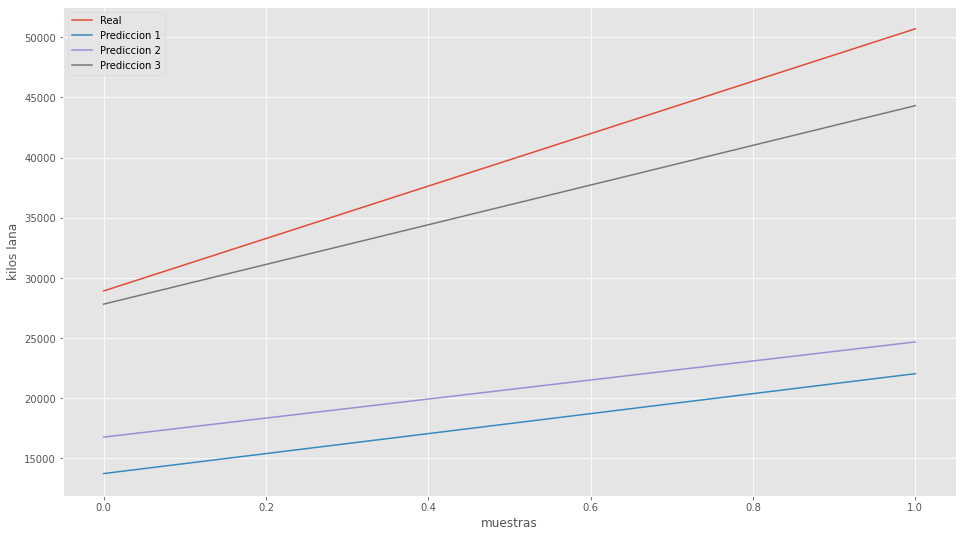

In [42]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(range(len(dato_real)),dato_real,label="Real")
plt.plot(range(len(resultado_prediccion_1)),resultado_prediccion_1,label="Prediccion 1")
plt.plot(range(len(resultado_prediccion_2)),resultado_prediccion_2,label="Prediccion 2")
plt.plot(range(len(resultado_prediccion_3)),resultado_prediccion_3,label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

Los gráficos nos muestran lo que nos indicaban las métricas, los modelos que no logran predecir estos datos estan más lejos de la línea real. 

El mejor modelo resulta ser el 3, seguido por el 2 y por último el 1. 

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -1.00 | 0.25 |
| 2 | 0 | -1.00 | -0.60 |
| 3 | 2 | -0.25| 1.50 |

## Pruebas con una tupla

La idea acá es simular que un productor cuenta con los datos de la lluvia y el total de ovejas, del año actual respectivo. Entonces le pasamos ambos datos al modelo, y con ellos hace la predicción para ese año, dándonos los corderos, dato que también conocemos y nos sirve para comparar el valor real con el valor predicho.

### Prueba 1

Se tomo una observación del dataset correspondiente a Cushamen del 2014 del Dataset 1.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 120803 | 640.4 | 40184 |

In [43]:
dato_real = 40184

In [44]:
resultado_prediccion_1 = modelo_corderos_1.predict([[640.4,120803]])
round(resultado_prediccion_1[0][0] - dato_real)

660

In [45]:
resultado_prediccion_2 = modelo_corderos_2.predict([[640.4,120803]])
round(resultado_prediccion_2[0][0] - dato_real)

967

In [46]:
resultado_prediccion_3 = modelo_corderos_3.predict([[640.4,120803]])
round(resultado_prediccion_3[0][0] - dato_real)

24280

En estos tres resultados, vemos que los modelos predijeron corderos demás, es decir el modelo 1 se paso por 660 corderos, el modelo 2 se paso por 967 corderos y el modelo 3 se paso por 24280 corderos.

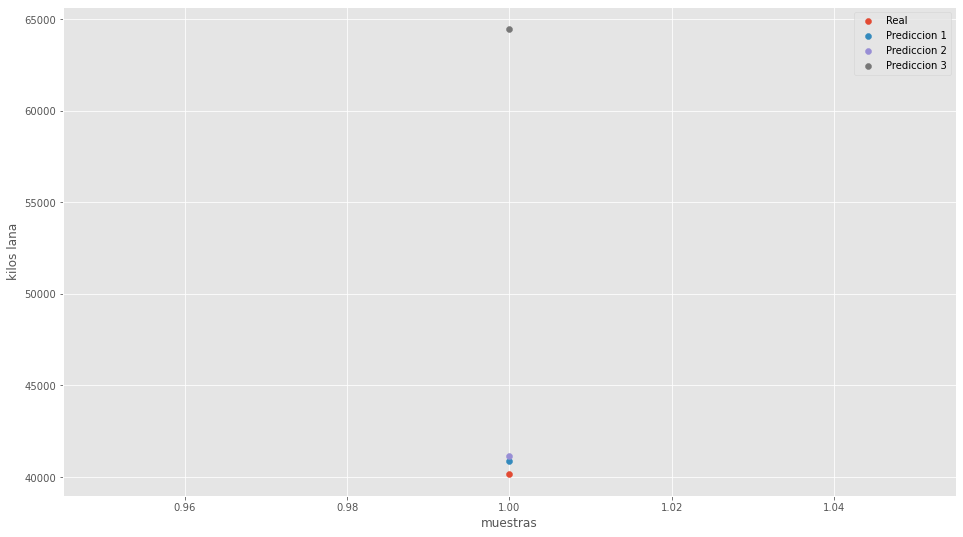

In [47]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(y=dato_real, x=1, label="Real")
plt.scatter(y=resultado_prediccion_1,x=1, label="Prediccion 1")
plt.scatter(y=resultado_prediccion_2,x=1, label="Prediccion 2")
plt.scatter(y=resultado_prediccion_3,x=1, label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

El mejor modelo resulta ser el 1, seguido por el 2 y por último el 3. Cómo acá no se puede calcular el R2, por estar trabajando con un solo dato, solo se va a tener en cuenta cuál es el modelo que esta mas cerca del dato real.

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 1 | -0.25 | 1.00 |
| 2 | 0 | -0.20 | -0.80|
| 3 | 0 | 0 | 1.50 |

### Prueba 2

Se tomo una observación del dataset correspondiente a Sarmiento del 2014 del Dataset 3.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 80123 | 69.45 | 37346 |

In [48]:
dato_real = 37346

In [49]:
resultado_prediccion_1 = modelo_corderos_1.predict([[69.45,80123]])
round(resultado_prediccion_1[0][0] - dato_real)

-20067

In [50]:
resultado_prediccion_2 = modelo_corderos_2.predict([[69.45,80123]])
round(resultado_prediccion_2[0][0] - dato_real)

-16891

In [51]:
resultado_prediccion_3 = modelo_corderos_3.predict([[69.45,80123]])
round(resultado_prediccion_3[0][0] - dato_real)

1219

En estos tres resultados, vemos que los modelos predijeron por un lado corderos de menos, como es el caso del modelo 1 que le falto 20067 corderos y el modelo 2 que le falto 16891 corderos, en cambio el modelo 3 se paso por 1219 corderos.

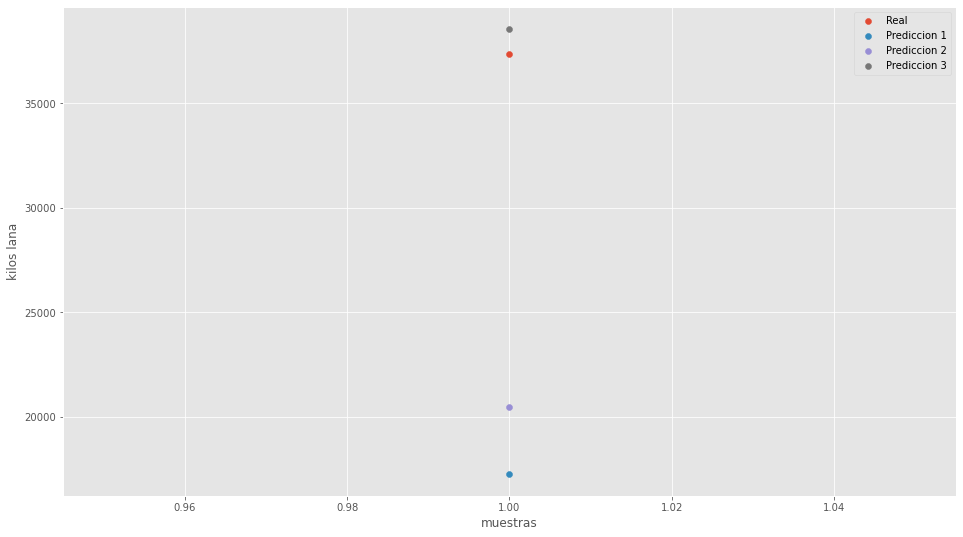

In [52]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(y=dato_real, x=1, label="Real")
plt.scatter(y=resultado_prediccion_1, x=1, label="Prediccion 1")
plt.scatter(y=resultado_prediccion_2, x=1, label="Prediccion 2")
plt.scatter(y=resultado_prediccion_3, x=1, label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

El mejor modelo resulta ser el 3, seguido por el 2 y por último el 1. Cómo acá no se puede calcular el R2, por estar trabajando con un solo dato, solo se va a tener en cuenta cuál es el modelo que esta mas cerca del dato real.

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | 0 | 1.00 |
| 2 | 0 | 0 | -0.80 |
| 3 | 1 | -0.25 | 2.25 |

### Prueba 3

Se tomo una observación del dataset correspondiente a Mirabueno del 2018 del Dataset 2.

| ovejas | cant_lluvia | corderos |
| --- | --- | --- |
| 1200 | 93.2 | 820 |

In [53]:
dato_real = 820

In [54]:
resultado_prediccion_1 = modelo_corderos_1.predict([[93.2,1200]])
round(resultado_prediccion_1[0][0] - dato_real)

-13617

In [55]:
resultado_prediccion_2 = modelo_corderos_2.predict([[93.2,1200]])
round(resultado_prediccion_2[0][0] - dato_real)

-7468

In [56]:
resultado_prediccion_3 = modelo_corderos_3.predict([[93.2,1200]])
round(resultado_prediccion_3[0][0] - dato_real)

-3491

En estos tres resultados, vemos que los modelos predijeron corderos de menos, es decir al modelo 1 le falto 13617, al modelo 2 le falto 7468 corderos y al modelo 3 le falto 3491 corderos.

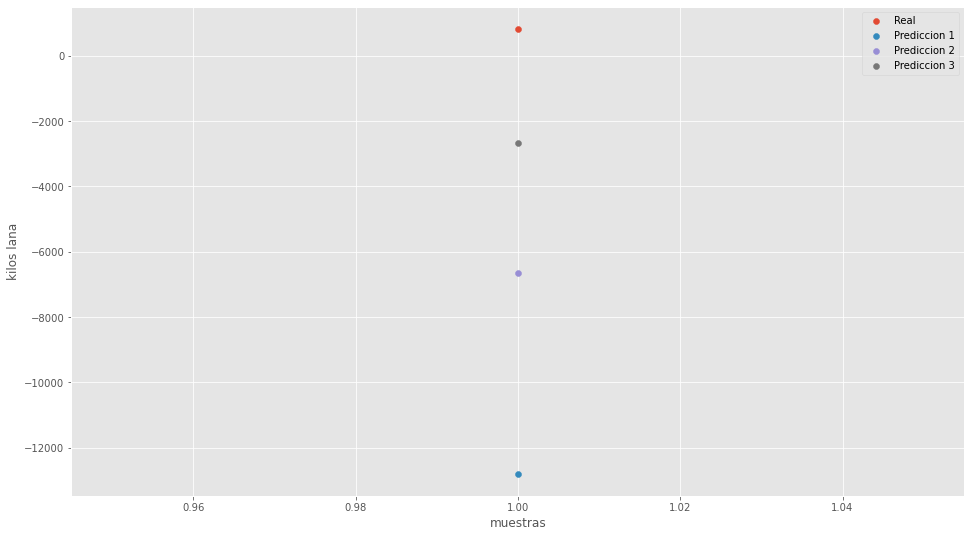

In [57]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(y=dato_real, x=1, label="Real")
plt.scatter(y=resultado_prediccion_1, x=1, label="Prediccion 1")
plt.scatter(y=resultado_prediccion_2, x=1, label="Prediccion 2")
plt.scatter(y=resultado_prediccion_3, x=1, label="Prediccion 3")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

El mejor modelo resulta ser el 3, seguido por el 2 y por último el 1. Cómo acá no se puede calcular el R2, por estar trabajando con un solo dato, solo se va a tener en cuenta cuál es el modelo que esta mas cerca del dato real.

| Modelo | Puntaje positvo | Puntaje negativo | Total |
| --- | --- | --- | --- |
| 1 | 0 | -0.20 | 0.80 |
| 2 | 0 | -0.25 | -1.05 |
| 3 | 1 | 0 | 3.25 |

## Resultados

El mejor **modelo es el 3** con un puntaje final de 3.25, seguido del modelo 1 con 0.8 y por último el modelo 2 con -1.05 puntos.